In [ ]:
# DevOps как методология

## LSTM — Long Short Term Memory


В области искусственного интеллекта и обработки последовательных данных рекуррентные нейронные сети (RNN) значительно изменили подходы к решению сложных задач. Однако, несмотря на их успех, у RNN есть свои ограничения, которые порой затрудняют обучение при работе с длинными последовательностями. В ответ на эти вызовы были разработаны сети с долгой краткосрочной памятью (LSTM), которые стали одним из самых революционных решений в этой области.

### Что такое LSTM?

Сети LSTM — это специализированная архитектура рекуррентных нейронных сетей, созданная для решения проблемы исчезающего градиента, с которой часто сталкиваются традиционные RNN. Они были предложены в 1997 году Сеппом Хохрейтером и Юргеном Шмидхубером и с тех пор стали стандартом в задачах, связанных с последовательными данными.

Ключевое отличие LSTM от традиционных RNN заключается в наличии специальных структур, называемых "ячейками" памяти. Эти ячейки позволяют LSTM сохранять и управлять информацией на протяжении долгого времени, что критически важно для успешного выполнения задач, где важен контекст.

LSTM разработаны специально, чтобы избежать проблемы долговременной зависимости. Запоминание информации на долгие периоды времени – это их обычное поведение, а не что-то, чему они с трудом пытаются обучиться.

Любая рекуррентная нейронная сеть имеет форму цепочки повторяющихся модулей нейронной сети. В обычной RNN структура одного такого модуля очень проста, например, он может представлять собой один слой с функцией активации tanh (гиперболический тангенс).

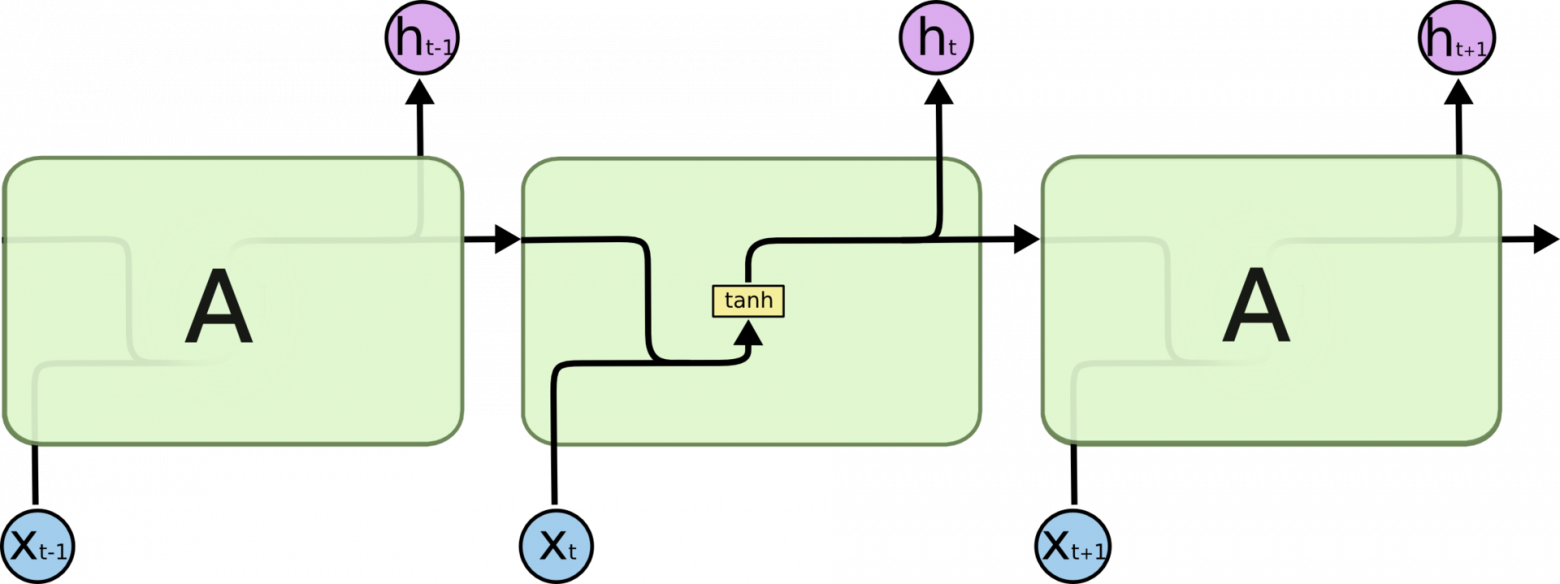

Структура LSTM также напоминает цепочку, но модули выглядят иначе. Вместо одного слоя нейронной сети они содержат целых четыре, и эти слои взаимодействуют особенным образом.

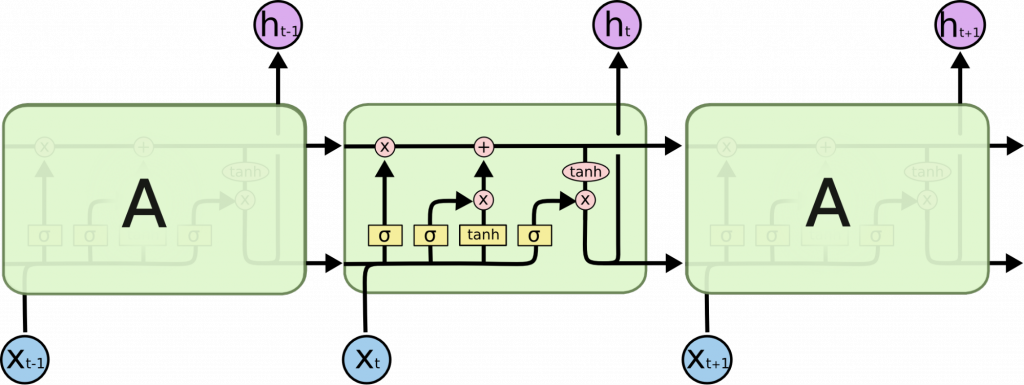

Познакомимся со специальными обозначениями:

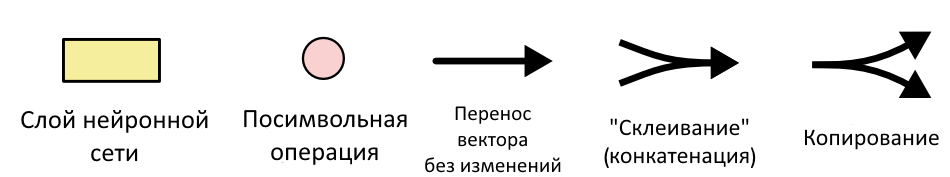

Во-первых, по «трубам» этой схемы текут вектора. Входное слово X(t) в синем кружочке — в виде вектора, в стрелочках — вектор, все операции — с векторами.

В желтых кирпичах — слой нейросети. Это значит, что там спрятаны три операции: сначала входной вектор умножается на матрицу весов слоя (которую нейросеть вырабатывает в ходе тренировки), к произведению прибавляется сдвиг (bias), наконец, вектор-сумма поэлементно проходит через функцию активации нейронов: сигмоиду или гиперболический тангенс.

Посимвольная операция означает, что что каждый элемент вектора по отдельности терпит какие-то изменения (как с функцией tanh), а «склеивание» из векторов [1, 2] и [3, 4] дает один вектор [1, 2, 3, 4].

**Архитектура LSTM** включает три основные компоненты, отвечающие за управление потоками информации:

* Входные ворота (Input Gate): определяет, какая информация из входных данных будет добавлена в ячейку памяти. Это позволяет LSTM адаптироваться к новому контексту, фильтруя несущественные данные.
* Забывающие ворота (Forget Gate): отвечает за удаление устаревшей информации из ячейки памяти. Эта функция помогает модели не загружать себя ненужными данными, что особенно важно при работе с длинными последовательностями.
* Выходные ворота (Output Gate): контролирует, какая информация будет передана на следующий этап обработки. Это позволяет LSTM эффективно использовать только ту информацию, которая необходима для текущего предсказания.

Эти ворота работают вместе, обеспечивая динамическое управление информацией, что делает LSTM особенно мощными для задач, связанных с последовательными данными.

### Вектор памяти LSTM

Передается со слоя на слой, из него составляется предсказание

Важнейшая часть LSTM — вот эта труба сверху. Она передает со слоя на слой вектор, кодирующий контекст (будем звать его «вектор памяти»).

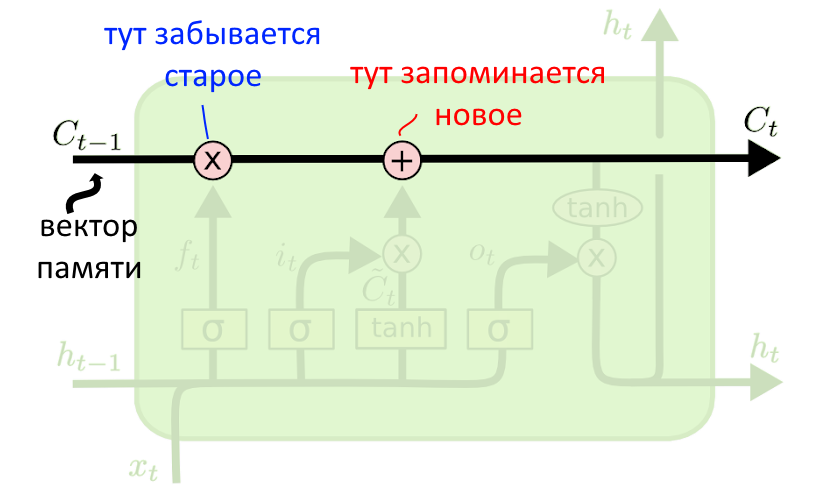

К трубе подключены два розовых «вентиля»: слева направо — вентиль «забывания» и вентиль «запоминания». Они контролируют, что нужно забыть, а что — запомнить.

После забывания и запоминания часть вектора памяти становится вектором-предсказанием слоя или его «скрытым состоянием» — hidden state, сокращенно h(t). Как это делается — расскажем чуть позже.

### Забывание контекста в LSTM

Первый шаг LSTM — оценить, какой контекст ей больше не нужен

Работа начинается так: с предыдущего слоя (или с начала работы нейросети) приехали два вектора: первый — h(t-1) предсказание прошлого слоя. Второй вектор — X(t), кодирует новое входное слово.

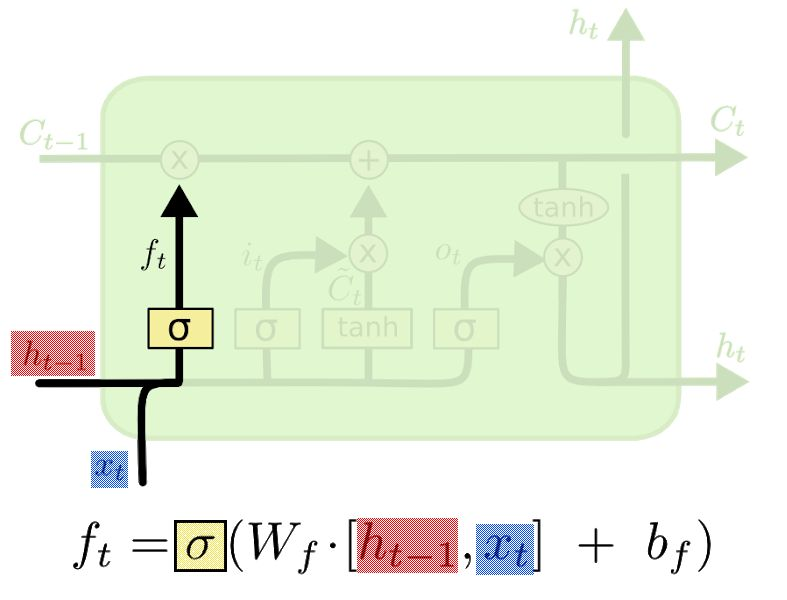

Вектора X(t) и h(t-1) сначала склеиваем, а затем умножаем на матрицу весов, которую выучила нейросеть в процессе тренировки. На формуле сверху эта матрица обозначена как W(f), что значит forget weights, веса забывания. К произведению добавляем сдвиг b(f).

Получившийся вектор-сумму поэлементно пропускаем через сигмоидную функцию активации (буква в желтом квадрате — «сигма»). Она решает, какие значения старого контекста нужно забыть. Для каждого элемента вектора функция выдает значение от 0 до 1, где 1 значит «оставить элемент целиком», а 0 — «целиком избавиться от элемента». Выходит вектор, который оценивает, насколько сильно нужно забыть ту или иную часть прошлого контекста. Так и назовём — «оценочный» вектор f(t).

Забыть контекст бывает нужно, например, если появилось новое подлежащее и надо запомнить его род и число. Для этого род и число старого подлежащего придется стереть. Разумеется, нейросеть не оперирует категориями подлежащего — но архитектура LSTM скорее всего вычислит, что оно появилось, и сумеет предположить, что старые род и число стали нерелевантны.

Итак, мы посмотрели на контекстный вектор, на вектор нового слова, решили, что хотим забыть части старого контекста, и выразили это желание вектором.

### Запоминание контекста в LSTM

Второй шаг LSTM — оценить, какой новый контекст надо записать и насколько он важен

Что теперь? Сперва решили, что «забыть», теперь решаем, что «запомнить». На входе, опять старый вектор-предсказание h(t-1) и новое слово X(t). Эти вектора склеиваются и попадают на два независимых слоя.

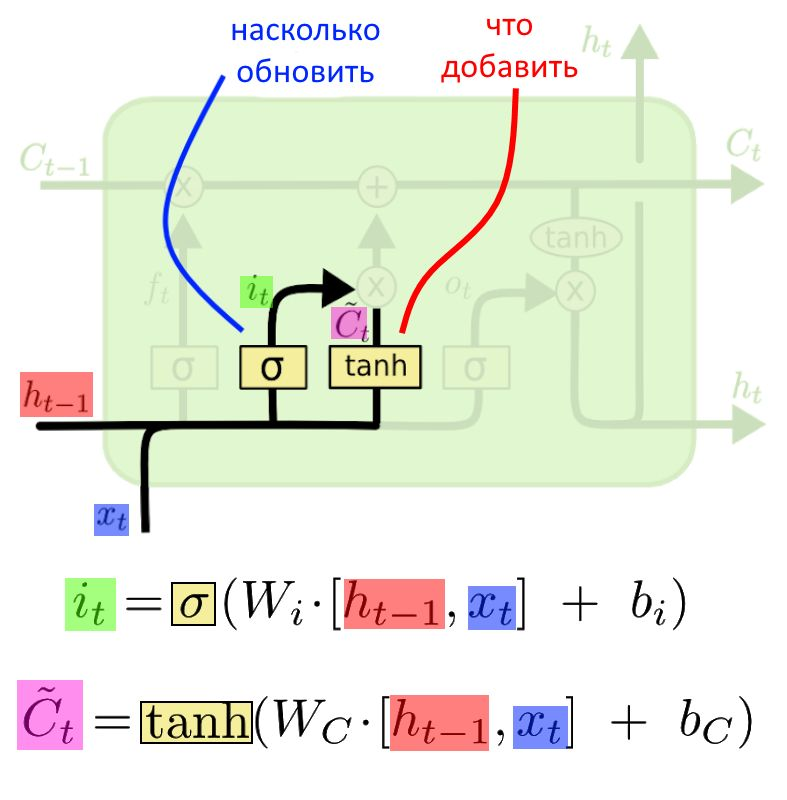

На слое справа (где написано tanh) вектора X(t) и h(t-1) умножаются на матрицу весов W(c), она получается в процессе тренировки. К произведению прибавляют сдвиг, и вектор-сумма поэлементно проходит через функцию активации «гиперболический тангенс», tanh. Так составляется вектор из новых значений, которые хочется записать в «вектор памяти». Назовем его «вектор новых значений».

Нейронный слой слева умножает вход на выученную матрицу весов W(i) — input weights, веса входа. Добавляется сдвиг b(i), и вектор-сумма поэлементно проходит через сигмоидную функцию. Так формируется «оценочный» вектор i(t): на него умножим «вектор новых значений». Если в оценочном векторе есть нули, какие-то элементы новых значений на них умножатся и не дойдут то контекста.

LSTM выразило, что важного хочется добавить в контекст. Но пока ничего туда не записывается.

### Запись новых значений в контекст

Забыть контекст — значит умножить его ненужные части на ноль из «оценочного вектора». Чтобы запомнить новый — прибавляем взвешенный «вектор новых значений»

Запись в вектор памяти происходит на этом шаге: мы умножаем старый вектор памяти на «оценочный» f(t), таким образом забывая (умножая на ноль) то, что решили забыть. А то, что решили не забывать, умножаем примерно на единицу (оставляем как есть).

К «забывшему» вектору памяти прибавляем взвешенный «вектор новых значений». Взвешенный — значит умноженный на «оценочный» i(t), то есть среди «сырых» новых значений некоторые тоже умножились на ноль и так и не попали в вектор контекста.

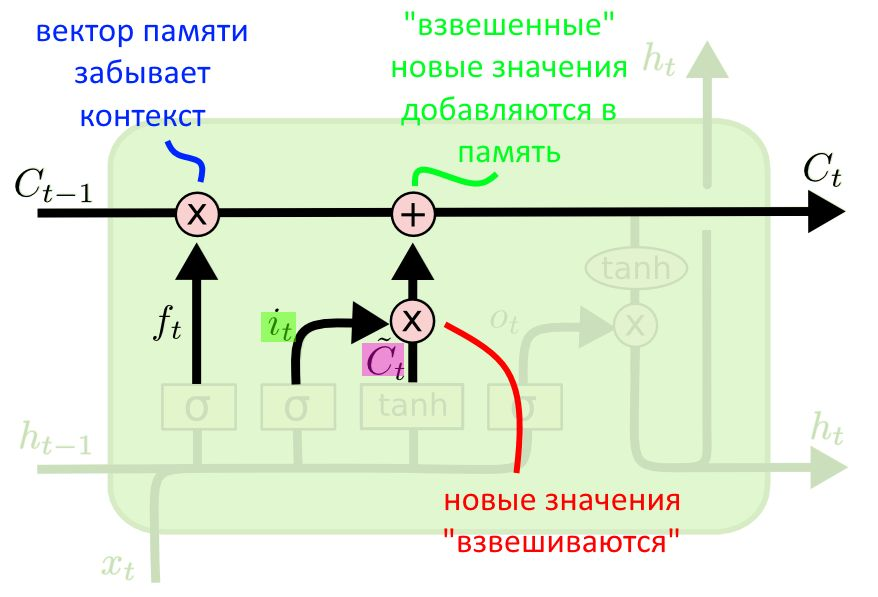

Если LSTM работает с языковой моделью, то это был как раз тот момент, когда мы стираем информацию о роде старого подлежащего и добавляем род нового.

##### Вопросы:
- Что такое сети LSTM?
- В чем отличие от сетей RNN?

### Предсказание LSTM

Предсказание получается из «фильтрованного» вектора контекста

Наконец решаем, какую часть «вектора памяти» подать дальше как предсказание. Слой с сигмоидной активацией снова определяет, какие части вектора памяти важны, строит свой «оценочный» вектор o(t) — это первая строка формул с картинки.

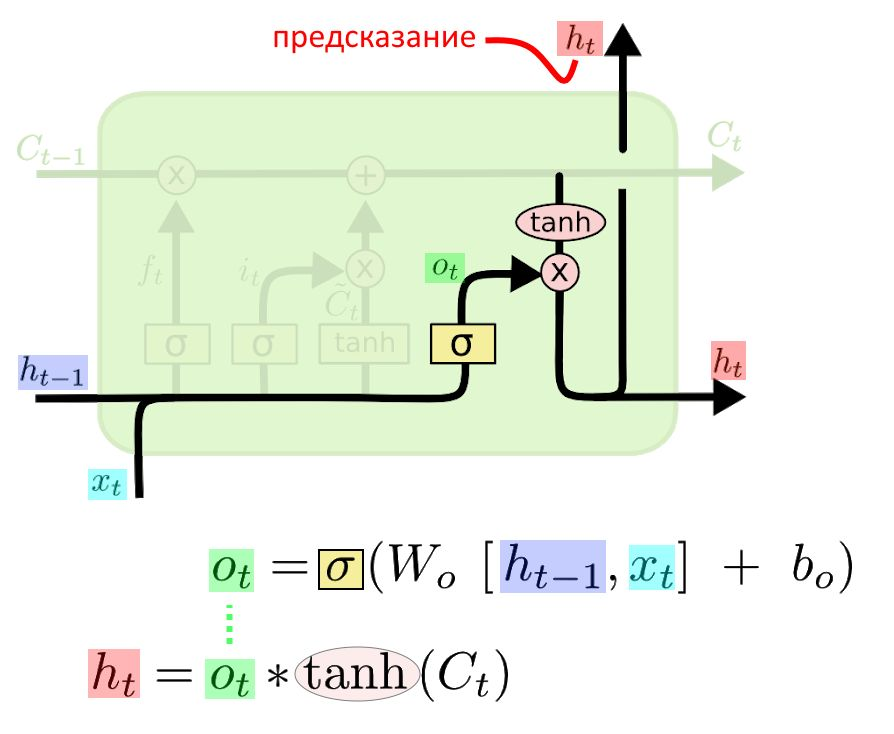

Допустим, в векторе контекста записано, что где-то в прошлом встретились слова «пушистый» и «деревянный». На вход подается «гладкий», и нужно сгенерировать следующее слово. Мы бы хотели увидеть «стол». Хороший оценочный вектор умножит на ноль контекстные данные о «пушистом» и на единицу — данные о «деревянном». Такой вектор получится умножением входных данных на хорошую матрицу весов: ее элементы правильно подбираются при тренировке. Матрица изменяема, она подстраивается под входные примеры во время обучения. Поэтому в нейросетях так важно найти качественные тренировочные данные.

Вектор памяти C(t) поэлементно «пропускается» через функцию tanh, и все крупные элементы становятся либо 1, либо −1. «Пушистый» и «деревянный» в контексте как бы приводятся к общему знаменателю. Наконец вектор контекста перемножается с «оценочным» — на второй строке формул. Раз теперь на входе «гладкий», прошлую «пушистость» чего-то там удалось забыть и сконцентрироваться на «деревянности»: так больше вероятность предсказать «деревянный гладкий стол». Получился вектор h(t).

Именно h(t) — предсказание, результат работы слоя LSTM.

Вот способ превратить h(t) в словарный номер следующего слова. h(t) умножим на тренируемую матрицу длиной в словарь (допустим, в словаре 100 тысяч слов), и «подсветим» самые большие значения результата функцией Softmax. Без подробностей — Softmax превращает элементы вектора в нули или в положительные числа, суммарно дающие единицу. Такой набор удобно толковать как вероятность встретить то или иное слово. Если третий элемент вектора — 0.8, значит, 0.8 — вероятность, что следующее слово — абажур (или что у нас третье в словаре по алфавиту).

### Применение LSTM

Сети LSTM нашли широкое применение в различных областях, таких как:

* Обработка естественного языка (NLP): LSTM используются для перевода текстов, генерации текста и анализа сентимента. Их способность сохранять контекст позволяет моделям лучше понимать значения слов в зависимости от их окружения.

* Создание музыки: LSTM могут генерировать музыкальные композиции, учитывая стиль и структуру известных произведений. Это открывает новые горизонты для творческого самовыражения и автоматизированного создания музыки.

* Предсказание временных рядов: LSTM успешно применяются для анализа данных о временных рядах, таких как курсы акций или погодные условия, где важно учитывать историческую информацию для принятия решений.

 ### Плюсы LSTM
1. **Запоминание долгосрочных зависимостей**: Главный плюс LSTM в том, что они могут хранить информацию о событиях, произошедших гораздо раньше в последовательности, по сравнению с обычными рекуррентными нейронными сетями (RNN). Это достигается благодаря особым элементам сети — механизмам затухания и забывания, которые помогают регулировать "память".

2. **Устойчивость к градиентному затуханию**: Обычные RNN страдают от проблемы затухания градиента, из-за чего дальние зависимости плохо учитываются. LSTM благодаря своей архитектуре менее подвержены этой проблеме, что позволяет им работать с более длинными последовательностями данных.

3. **Гибкость**: LSTM могут адаптироваться к данным с разными временными зависимостями, что делает их полезными как для краткосрочных, так и для долгосрочных прогнозов. Это особенно ценно в задачах временных рядов, где есть разночастотные зависимости.

4. **Универсальность**: Эти сети хорошо применимы в широком спектре задач — от машинного перевода до анализа финансовых данных. Их можно легко интегрировать в сложные архитектуры, такие как последовательные или многоуровневые сети, что позволяет создавать гибридные модели.




### Минусы LSTM
1. **Высокая вычислительная сложность**: LSTM сложнее стандартных RNN и требуют больше вычислительных ресурсов из-за их сложной структуры и множества параметров. Это особенно ощутимо при обработке длинных последовательностей или работе с большими объемами данных.

2. **Долгое время обучения**: Из-за высокой вычислительной сложности и большого числа параметров LSTM сети могут долго обучаться. В задачах с большим объемом данных это может потребовать значительных вычислительных ресурсов, таких как мощные графические процессоры (GPU).

3. **Переобучение**: LSTM могут легко переобучиться, особенно на малых объемах данных. Из-за большого количества параметров сеть может подстроиться под обучающие данные, но плохо обобщать на новые примеры. Это требует регуляризации, подбора гиперпараметров и применения техник предотвращения переобучения.

4. **Затруднения с очень длинными последовательностями**: Несмотря на то, что LSTM лучше обычных RNN в обработке длинных зависимостей, их память всё же ограничена. В случае очень длинных последовательностей (например, обработка целой книги) LSTM могут начать терять информацию, особенно если зависимости очень отдалённые.

5. **Сложность интерпретации**: Как и многие другие глубокие нейронные сети, LSTM сложны для интерпретации. Выявить, что именно сеть запомнила и какие зависимости уловила, бывает сложно. Это делает трудной диагностику и улучшение модели в случае ошибок.




### Альтернативы LSTM
Из-за некоторых ограничений LSTM появились и другие подходы для работы с последовательностями:
- **GRU (Gated Recurrent Unit)**: Упрощённая версия LSTM, которая быстрее в обучении, но может уступать по точности в некоторых задачах.
- **Трансформеры**: Модели типа Transformer и их улучшенные версии, такие как BERT и GPT, показали отличные результаты, особенно в задачах обработки естественного языка. Они способны обрабатывать очень длинные последовательности, так как учитывают всю последовательность данных одновременно, а не поэтапно, как LSTM.

##### Вопросы:
- Как работают сети LSTM?

### ПРАКТИКА 1

#### Пошаговая реализация многомерного прогноза с использованием LSTM

> Многомерное прогнозирование предполагает использование множества переменных, зависящих от времени, для генерации прогнозов.

### Импорт необходимых модулей

In [ ]:
# Импортируем модули и библиотеки, необходимые для обработки данных, машинного обучения и создания моделей на Keras.

import datetime  # Работа с датами и временем
import sklearn  # Библиотека для машинного обучения
from sklearn.impute import SimpleImputer  # Импьютер для заполнения пропущенных значений
from sklearn.preprocessing import MinMaxScaler  # Нормализация данных
from sklearn.decomposition import KernelPCA  # Нелинейное понижение размерности с помощью Kernel PCA
import numpy as np  # Работа с многомерными массивами и матрицами
import pandas as pd  # Работа с таблицами данных

import math  # Математические функции, такие как вычисление корней, логарифмов и т.д.
import keras  # Фреймворк для создания нейронных сетей
import matplotlib.pyplot as plt  # Библиотека для построения графиков
import tensorflow as tf  # Библиотека для машинного обучения и нейросетей
tf.random.set_seed(99)  # Устанавливаем фиксированное значение seed для генератора случайных чисел, чтобы обеспечить воспроизводимость результатов


# Подключаем Google Drive
from google.colab import drive  # Импортируем модуль для работы с Google Drive в Google Colab
drive.mount('/content/drive')  # Монтируем Google Drive к директории '/content/drive'

Mounted at /content/drive


In [ ]:
# Загрузка набора данных из CSV-файла в DataFrame с использованием библиотеки pandas
dataFrame = pd.read_csv('drive/MyDrive/final_data_adj.csv')



In [ ]:
dataFrame.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,MACD,MACDsig,MACDhist,SMA,CCI,Aroon Up,Aroon Down,Sadj
0,2017-08-28,9907.150391,9925.750000,9882.000000,9912.799805,9912.799805,159600.0,55.406997,28.647258,28.317577,0.515867,12759.905212,24.363507,0.0,0.0,NaN
1,2017-08-29,9886.400391,9887.349609,9783.750000,9796.049805,9796.049805,173300.0,55.406997,28.647258,28.317577,0.515867,12759.905212,24.363507,0.0,0.0,162.055635
2,2017-08-30,9859.500000,9909.450195,9850.799805,9884.400391,9884.400391,157800.0,55.406997,28.647258,28.317577,0.515867,12759.905212,24.363507,0.0,0.0,-22.453545
3,2017-08-31,9905.700195,9925.099609,9856.950195,9917.900391,9917.900391,327700.0,55.406997,28.647258,28.317577,0.515867,12759.905212,24.363507,0.0,0.0,-9.197608
4,2017-09-01,9937.650391,9983.450195,9909.849609,9974.400391,9974.400391,157800.0,55.406997,28.647258,28.317577,0.515867,12759.905212,24.363507,0.0,0.0,5259.919641


### Предварительная обработка данных

In [ ]:
# Создаем объект SimpleImputer для обработки пропущенных значений
imputer = SimpleImputer(missing_values=np.nan)  # Заменяем пропущенные значения на среднее или другое значение по умолчанию

# Удаляем столбец 'Date', так как даты не будут использоваться для обучения модели
dataFrame.drop(columns=['Date'], inplace=True)


In [ ]:
imputer.fit_transform(dataFrame)

array([[ 9.90715039e+03,  9.92575000e+03,  9.88200000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  2.93522086e+03],
       [ 9.88640039e+03,  9.88734961e+03,  9.78375000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.62055635e+02],
       [ 9.85950000e+03,  9.90945019e+03,  9.85079981e+03, ...,
         0.00000000e+00,  0.00000000e+00, -2.24535454e+01],
       ...,
       [ 1.75254492e+04,  1.76236504e+04,  1.74992500e+04, ...,
         6.42857143e-01,  9.28571429e-01,  4.27427947e+03],
       [ 1.76790000e+04,  1.77265000e+04,  1.74874492e+04, ...,
         5.71428571e-01,  8.57142857e-01,  3.16775910e+03],
       [ 1.76193008e+04,  1.76858496e+04,  1.75193496e+04, ...,
         5.00000000e-01,  7.85714286e-01,  7.85840187e+02]])

In [ ]:
# Применяем SimpleImputer для замены пропущенных значений в данных
dataFrame = pd.DataFrame(imputer.fit_transform(dataFrame), columns=dataFrame.columns)

# Сбрасываем индексы DataFrame после изменений
dataFrame = dataFrame.reset_index(drop=True)

dataFrame

,Open,High,Low,Close,Adj Close,Volume,RSI,MACD,MACDsig,MACDhist,SMA,CCI,Aroon Up,Aroon Down,Sadj
0,9907.150391,9925.750000,9882.000000,9912.799805,9912.799805,159600.0,55.406997,28.647258,28.317577,0.515867,12759.905212,24.363507,0.000000,0.000000,2935.220856
1,9886.400391,9887.349609,9783.750000,9796.049805,9796.049805,173300.0,55.406997,28.647258,28.317577,0.515867,12759.905212,24.363507,0.000000,0.000000,162.055635
2,9859.500000,9909.450195,9850.799805,9884.400391,9884.400391,157800.0,55.406997,28.647258,28.317577,0.515867,12759.905212,24.363507,0.000000,0.000000,-22.453545
3,9905.700195,9925.099609,9856.950195,9917.900391,9917.900391,327700.0,55.406997,28.647258,28.317577,0.515867,12759.905212,24.363507,0.000000,0.000000,-9.197608
4,9937.650391,9983.450195,9909.849609,9974.400391,9974.400391,157800.0,55.406997,28.647258,28.317577,0.515867,12759.905212,24.363507,0.000000,0.000000,5259.919641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,17682.900391,17690.050781,17467.349609,17490.699219,17490.699219,287600.0,53.212894,208.974422,276.509693,-67.535270,17407.845204,-30.373314,0.785714,0.071429,645.590963
1821,17357.349609,17625.550781,17345.199219,17577.500000,17577.500000,285600.0,57.211306,187.134510,258.634656,-71.500146,17438.412435,-51.317372,0.714286,1.000000,2362.044621
1822,17525.449219,17623.650391,17499.250000,17604.949219,17604.949219,262000.0,58.421409,170.080561,240.923837,-70.843276,17470.877409,-32.282705,0.642857,0.928571,4274.279466
1823,17679.000000,17726.500000,17487.449219,17522.449219,17522.449219,230200.0,53.522099,148.199769,222.379023,-74.179254,17505.497396,-37.494292,0.571429,0.857143,3167.759103


In [ ]:
# Масштабирование признаков
scaler = MinMaxScaler(feature_range=(0, 1))  # Нормализация признаков в диапазоне от 0 до 1
df_scaled = scaler.fit_transform(dataFrame.to_numpy())  # Преобразуем DataFrame в массив и масштабируем

In [ ]:
df_scaled

array([[0.19986754, 0.17873669, 0.2168334 , ..., 0.        , 0.        ,
        0.17239144],
       [0.19795813, 0.17510287, 0.20784783, ..., 0.        , 0.        ,
        0.16717261],
       [0.19548275, 0.17719424, 0.21397995, ..., 0.        , 0.        ,
        0.16682538],
       ...,
       [0.9009036 , 0.90718723, 0.91347783, ..., 0.64285714, 0.92857143,
        0.17491142],
       [0.91503334, 0.91691987, 0.91239857, ..., 0.57142857, 0.85714286,
        0.17282906],
       [0.90953982, 0.91307313, 0.91531606, ..., 0.5       , 0.78571429,
        0.16834651]])

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=list(dataFrame.columns))  # Преобразуем обратно в DataFrame с исходными именами столбцов
df_scaled

,Open,High,Low,Close,Adj Close,Volume,RSI,MACD,MACDsig,MACDhist,SMA,CCI,Aroon Up,Aroon Down,Sadj
0,0.199868,0.178737,0.216833,0.211888,0.211888,0.088128,0.573174,0.753954,0.738291,0.504494,0.441765,0.541449,0.000000,0.000000,0.172391
1,0.197958,0.175103,0.207848,0.201145,0.201145,0.095693,0.573174,0.753954,0.738291,0.504494,0.441765,0.541449,0.000000,0.000000,0.167173
2,0.195483,0.177194,0.213980,0.209275,0.209275,0.087134,0.573174,0.753954,0.738291,0.504494,0.441765,0.541449,0.000000,0.000000,0.166825
3,0.199734,0.178675,0.214542,0.212358,0.212358,0.180950,0.573174,0.753954,0.738291,0.504494,0.441765,0.541449,0.000000,0.000000,0.166850
4,0.202674,0.184197,0.219380,0.217557,0.217557,0.087134,0.573174,0.753954,0.738291,0.504494,0.441765,0.541449,0.000000,0.000000,0.176766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0.915392,0.913471,0.910560,0.909233,0.909233,0.158807,0.545954,0.898859,0.961158,0.326830,0.928194,0.461065,0.785714,0.071429,0.168083
1821,0.885435,0.907367,0.899389,0.917220,0.917220,0.157703,0.595558,0.881309,0.945107,0.316479,0.931393,0.430307,0.714286,1.000000,0.171313
1822,0.900904,0.907187,0.913478,0.919746,0.919746,0.144671,0.610570,0.867605,0.929204,0.318194,0.934791,0.458261,0.642857,0.928571,0.174911
1823,0.915033,0.916920,0.912399,0.912154,0.912154,0.127112,0.549790,0.850022,0.912551,0.309485,0.938414,0.450607,0.571429,0.857143,0.172829


In [ ]:
# Масштабируем целевые столбцы 'Open' и 'Close' отдельно для использования в прогнозах
target_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled[['Open', 'Close']] = target_scaler.fit_transform(dataFrame[['Open', 'Close']].to_numpy())

# Преобразуем все значения DataFrame в тип float для совместимости с моделью
df_scaled = df_scaled.astype(float)


In [ ]:
df_scaled

,Open,High,Low,Close,Adj Close,Volume,RSI,MACD,MACDsig,MACDhist,SMA,CCI,Aroon Up,Aroon Down,Sadj
0,0.199868,0.178737,0.216833,0.211888,0.211888,0.088128,0.573174,0.753954,0.738291,0.504494,0.441765,0.541449,0.000000,0.000000,0.172391
1,0.197958,0.175103,0.207848,0.201145,0.201145,0.095693,0.573174,0.753954,0.738291,0.504494,0.441765,0.541449,0.000000,0.000000,0.167173
2,0.195483,0.177194,0.213980,0.209275,0.209275,0.087134,0.573174,0.753954,0.738291,0.504494,0.441765,0.541449,0.000000,0.000000,0.166825
3,0.199734,0.178675,0.214542,0.212358,0.212358,0.180950,0.573174,0.753954,0.738291,0.504494,0.441765,0.541449,0.000000,0.000000,0.166850
4,0.202674,0.184197,0.219380,0.217557,0.217557,0.087134,0.573174,0.753954,0.738291,0.504494,0.441765,0.541449,0.000000,0.000000,0.176766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0.915392,0.913471,0.910560,0.909233,0.909233,0.158807,0.545954,0.898859,0.961158,0.326830,0.928194,0.461065,0.785714,0.071429,0.168083
1821,0.885435,0.907367,0.899389,0.917220,0.917220,0.157703,0.595558,0.881309,0.945107,0.316479,0.931393,0.430307,0.714286,1.000000,0.171313
1822,0.900904,0.907187,0.913478,0.919746,0.919746,0.144671,0.610570,0.867605,0.929204,0.318194,0.934791,0.458261,0.642857,0.928571,0.174911
1823,0.915033,0.916920,0.912399,0.912154,0.912154,0.127112,0.549790,0.850022,0.912551,0.309485,0.938414,0.450607,0.571429,0.857143,0.172829


### Подготовка данных

In [ ]:
# len(df) = 10
# window = 4

# 0 1 2 3
#   1 2 3 4
#     2 3 4 5
#       3 4 5 6
#         4 5 6 7
#         ...


In [ ]:
# Функция для подготовки данных в виде скользящих окон (single step) для временных рядов
def singleStepSampler(df, window):
    xRes = []  # Список для хранения образцов входных данных
    yRes = []  # Список для хранения целевых значений
    for i in range(0, len(df) - window):  # Проходим по всем возможным окнам в данных
        res = []
        for j in range(0, window):  # Собираем данные для каждого окна
            r = []
            for col in df.columns:  # Добавляем данные по каждому столбцу в окно
                r.append(df[col][i + j])
            res.append(r)  # Добавляем строку данных в текущий образец окна
        xRes.append(res)  # Добавляем завершенный образец окна в итоговый список входных данных
        yRes.append(df[['Open', 'Close']].iloc[i + window].values)  # Добавляем целевое значение для данного окна
    return np.array(xRes), np.array(yRes)  # Преобразуем списки в массивы numpy и возвращаем их


### Разделение данных

In [ ]:
# Разделение набора данных на обучающую и тестовую выборки
SPLIT = 0.85  # Определяем долю данных, используемых для обучения (85%)

# Применяем функцию singleStepSampler для создания выборок с окнами длиной 20
(xVal, yVal) = singleStepSampler(df_scaled, 50)

# Разделяем данные на обучающую и тестовую выборки в соотношении, заданном SPLIT
X_train = xVal[:int(SPLIT * len(xVal))]  # Обучающая выборка для входных данных
y_train = yVal[:int(SPLIT * len(yVal))]  # Обучающая выборка для целевых значений
X_test = xVal[int(SPLIT * len(xVal)):]   # Тестовая выборка для входных данных
y_test = yVal[int(SPLIT * len(yVal)):]   # Тестовая выборка для целевых значений


In [ ]:
y_train

array([[0.22935996, 0.24148784],
       [0.22768059, 0.23931603],
       [0.22776794, 0.23339894],
       ...,
       [0.85725861, 0.86253069],
       [0.86215867, 0.8794355 ],
       [0.86940974, 0.901038  ]])

### Определение модели LSTM

In [ ]:
# Создаем последовательную модель нейронной сети LSTM
multivariate_lstm = keras.Sequential()

# Добавляем слой LSTM с 200 нейронами; входные данные имеют размерность (длина окна, количество признаков)
multivariate_lstm.add(keras.layers.LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2])))

# Добавляем слой Dropout для регуляризации, чтобы предотвратить переобучение (выключаем 20% нейронов случайным образом)
multivariate_lstm.add(keras.layers.Dropout(0.2))

# Добавляем полносвязный слой с 2 выходами (для предсказания значений 'Open' и 'Close') и линейной активацией
multivariate_lstm.add(keras.layers.Dense(2, activation='linear'))

# Компилируем модель с функцией потерь MeanSquaredError и метрикой MAE; оптимизатор — Adam
multivariate_lstm.compile(loss='MeanSquaredError', metrics=['MAE'], optimizer='Adam')

# Выводим краткую информацию о модели
multivariate_lstm.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 200)                 │         172,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             402 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,202 (676.57 KB)

 Trainable params: 173,202 (676.57 KB)

 Non-trainable params: 0 (0.00 B)

### Обучение модели

In [ ]:
# Обучаем модель LSTM на обучающих данных
history = multivariate_lstm.fit(X_train, y_train, epochs=20)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MAE: 0.1429 - loss: 0.0491
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.0378 - loss: 0.0024
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.0320 - loss: 0.0017
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MAE: 0.0310 - loss: 0.0016
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.0278 - loss: 0.0013
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.0281 - loss: 0.0014
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.0267 - loss: 0.0012
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.0246 - loss: 0.0010
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.0259 - loss: 0.0012
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.0241 - loss: 0.0010
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MAE: 0.0229 - loss: 8.8917e-04
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.0228 - loss: 8.9347e-04
Epoch 13/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s

### Прогнозирование

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


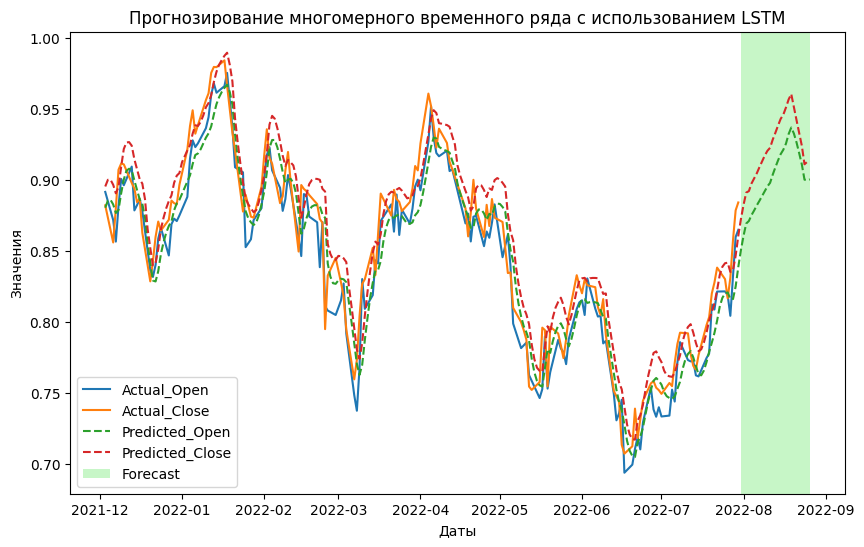

In [ ]:
# Перезагружаем данные и устанавливаем дату в качестве индекса
dataFrame = pd.read_csv('drive/MyDrive/final_data_adj.csv')  # Предполагается, что CSV-файл содержит столбец 'Date'
dataFrame['Date'] = pd.to_datetime(dataFrame['Date'])  # Преобразуем строки с датами в объекты datetime
dataFrame.set_index('Date', inplace=True)  # Устанавливаем 'Date' в качестве индекса DataFrame

# Прогнозирование значений для тестовой выборки
predicted_values = multivariate_lstm.predict(X_test)

# Создаем DataFrame для сравнения прогнозов и фактических значений
d = {
    'Predicted_Open': predicted_values[:, 0],  # Прогнозируемое значение 'Open'
    'Predicted_Close': predicted_values[:, 1],  # Прогнозируемое значение 'Close'
    'Actual_Open': y_test[:, 0],  # Фактическое значение 'Open'
    'Actual_Close': y_test[:, 1],  # Фактическое значение 'Close'
}

d = pd.DataFrame(d)  # Конвертируем словарь в DataFrame
d.index = dataFrame.index[-len(y_test):]  # Присваиваем корректный индекс с датами из исходного DataFrame

# Построение графика для сравнения прогнозируемых и фактических значений
fig, ax = plt.subplots(figsize=(10, 6))

# Определяем границы для выделения части прогноза
highlight_start = int(len(d) * 0.9)  # Начало выделенной области (10% от конца данных)
highlight_end = len(d) - 1  # Конец выделенной области (последний индекс)

# Строим график фактических значений до выделенной области прогноза
plt.plot(d[['Actual_Open', 'Actual_Close']][:highlight_start], label=['Actual_Open', 'Actual_Close'])

# Строим график прогнозируемых значений с пунктирной линией
plt.plot(d[['Predicted_Open', 'Predicted_Close']], label=['Predicted_Open', 'Predicted_Close'], linestyle='--')

# Выделяем область прогноза цветом
plt.axvspan(d.index[highlight_start], d.index[highlight_end], facecolor='lightgreen', alpha=0.5, label='Forecast')

# Добавляем заголовок и подписи осей
plt.title('Прогнозирование многомерного временного ряда с использованием LSTM')
plt.xlabel('Даты')
plt.ylabel('Значения')

# Отображаем легенду и выводим график
ax.legend()
plt.show()


### Оценка модели

In [ ]:
# Функция для оценки качества предсказаний модели с использованием метрик MSE, MAE и R2
def eval(model):
    return {
        'MSE': sklearn.metrics.mean_squared_error(d[f'Actual_{model.split("_")[1]}'].to_numpy(), d[model].to_numpy()),
        'MAE': sklearn.metrics.mean_absolute_error(d[f'Actual_{model.split("_")[1]}'].to_numpy(), d[model].to_numpy()),
        'R2': sklearn.metrics.r2_score(d[f'Actual_{model.split("_")[1]}'].to_numpy(), d[model].to_numpy())
    }

# Словарь для хранения результатов оценки для каждого предсказанного столбца
result = dict()

# Оценка метрик для предсказанных значений 'Open' и 'Close'
for item in ['Predicted_Open', 'Predicted_Close']:
    result[item] = eval(item)  # Сохраняем результаты оценки в словаре result

# Выводим результаты оценки
result


{'Predicted_Open': {'MSE': 0.00025187753399552495,
  'MAE': 0.01236740424570242,
  'R2': 0.9397237436375453},
 'Predicted_Close': {'MSE': 0.0004167827001524244,
  'MAE': 0.015981415070243872,
  'R2': 0.8986678961024948}}

В заключение мы можем видеть, что для обеих переменных-предикторов ошибки очень малы, а оценка R2 достаточно высока. Здесь показано, что наша модель LSTM работает очень хорошо, но может работать лучше при настройке гиперпараметров и заблаговременном снижении потерь.

### ПРАКТИКА 2

#### LSTM для прогнозирования временных рядов

В этом примере используется набор данных о пассажирах международных авиалиний, в котором показано общее количество пассажиров авиакомпаний за каждый месяц с 1949 по 1960 год.

### Импорт необходимых библиотек

In [ ]:
# Импортируем необходимые библиотеки для анализа данных, построения графиков и создания модели LSTM

import numpy as np  # Библиотека для работы с многомерными массивами и матрицами
import pandas as pd  # Библиотека для работы с табличными данными

import matplotlib.pyplot as plt  # Библиотека для построения графиков и визуализации данных

# Импортируем классы и функции из Keras для создания и настройки нейронной сети LSTM
from keras.models import Sequential  # Класс для создания последовательной модели
from keras.layers import Dense, LSTM  # Классы для полносвязного слоя и слоя LSTM

from sklearn.preprocessing import MinMaxScaler  # Класс для нормализации данных в диапазоне от 0 до 1
from sklearn.metrics import mean_squared_error  # Функция для вычисления среднеквадратической ошибки (MSE)


### Загрузка и визуализация набора данных

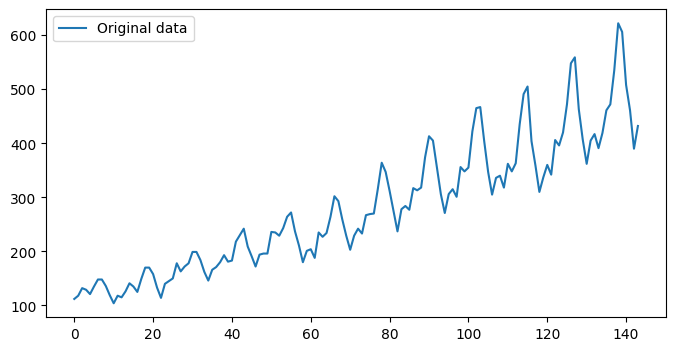

In [ ]:
# Загрузка набора данных о международных авиапассажирах
passenger_data_url = "drive/MyDrive/international-airline-passengers.csv"  # Локальный путь к файлу CSV
passenger_dataframe = pd.read_csv(passenger_data_url, usecols=[1], engine='python')  # Чтение данных, выбирая только второй столбец (число пассажиров)

# Визуализация оригинального набора данных
plt.figure(figsize=(8, 4))  # Устанавливаем размер графика
plt.plot(passenger_dataframe, label='Original data')  # Строим график с данными о пассажирах
plt.legend()  # Добавляем легенду к графику
plt.show()  # Отображаем график


In [ ]:
passenger_dataframe.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


### Предварительная обработка набора данных

In [ ]:
# Преобразуем данные в массив Numpy и нормализуем
passenger_array = passenger_dataframe.values.astype('float32')  # Конвертируем данные в массив Numpy с типом float32
scaler_toolbox = MinMaxScaler(feature_range=(0, 1))  # Создаем объект MinMaxScaler для нормализации данных в диапазоне от 0 до 1
normalized_passenger_data = scaler_toolbox.fit_transform(passenger_array)  # Применяем нормализацию к данным

# Делим данные на обучающую и тестовую выборки
partition_size = int(len(normalized_passenger_data) * 0.67)  # Определяем размер обучающей выборки (67% от общего количества данных)
remainder_size = len(normalized_passenger_data) - partition_size  # Определяем размер тестовой выборки
train_partition, test_partition = normalized_passenger_data[0:partition_size, :], normalized_passenger_data[partition_size:len(normalized_passenger_data), :]  # Разделяем данные


### Подготовка набора данных для LSTM

In [ ]:
# Функция для организации данных в виде последовательностей для модели LSTM
def organize_data(sequence_data, history_length=1):
    input_data, target_data = [], []  # Списки для хранения входных и целевых данных
    for idx in range(len(sequence_data) - history_length - 1):  # Проходим по всем доступным данным, оставляя место для истории
        fragment = sequence_data[idx:(idx + history_length), 0]  # Берем фрагмент данных длиной history_length
        input_data.append(fragment)  # Добавляем фрагмент в список входных данных
        target_data.append(sequence_data[idx + history_length, 0])  # Добавляем соответствующее целевое значение
    return np.array(input_data), np.array(target_data)  # Возвращаем массивы входных и целевых данных

# Задаем длину истории для последовательности (количество предыдущих значений для предсказания следующего)
history_length = 10

# Организуем данные для обучения и тестирования, используя заданную длину истории
train_input, train_target = organize_data(train_partition, history_length)  # Организация обучающих данных
test_input, test_target = organize_data(test_partition, history_length)  # Организация тестовых данных

# Преобразуем входные данные в необходимый для LSTM формат
train_input = np.reshape(train_input, (train_input.shape[0], 1, train_input.shape[1]))  # Добавляем размерность для входа в модель
test_input = np.reshape(test_input, (test_input.shape[0], 1, test_input.shape[1]))  # Аналогично для тестовых данных


In [ ]:
train_input

array([[[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
         0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753]],

       [[0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
         0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ]],

       [[0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207,
         0.08494207, 0.06177607, 0.02895753, 0.        , 0.02702703]],

       [[0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207,
         0.06177607, 0.02895753, 0.        , 0.02702703, 0.02123553]],

       [[0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607,
         0.02895753, 0.        , 0.02702703, 0.02123553, 0.04247104]],

       [[0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753,
         0.        , 0.02702703, 0.02123553, 0.04247104, 0.07142857]],

       [[0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
         0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557]],

       [[0.08

### Построение и обучение модели LSTM

In [ ]:
# Создаем модель LSTM для прогнозирования данных о пассажирах
flight_model = Sequential()  # Инициализация последовательной модели

# Добавляем слой LSTM с 4 нейронами; input_shape указывает на размерность входных данных (1 временной шаг, history_length признаков)
flight_model.add(LSTM(100, input_shape=(1, history_length)))

# Добавляем слой Dropout для регуляризации, чтобы предотвратить переобучение (выключаем 20% нейронов случайным образом)
multivariate_lstm.add(keras.layers.Dropout(0.2))

# Добавляем полносвязный слой, который будет выдавать одно значение (прогнозируемое значение)
flight_model.add(Dense(1))

# Компилируем модель, указывая функцию потерь (среднеквадратическая ошибка) и оптимизатор (Adam)
flight_model.compile(loss='mean_squared_error', optimizer='adam')

# Обучаем модель на обучающих данных; epochs указывает на количество полных проходов по данным, batch_size — размер мини-партии
flight_model.fit(train_input, train_target, epochs=100, batch_size=1, verbose=2)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 - 1s - 13ms/step - loss: 0.0155
Epoch 2/100
85/85 - 0s - 3ms/step - loss: 0.0053
Epoch 3/100
85/85 - 0s - 3ms/step - loss: 0.0046
Epoch 4/100
85/85 - 0s - 3ms/step - loss: 0.0042
Epoch 5/100
85/85 - 0s - 3ms/step - loss: 0.0039
Epoch 6/100
85/85 - 0s - 3ms/step - loss: 0.0036
Epoch 7/100
85/85 - 0s - 3ms/step - loss: 0.0033
Epoch 8/100
85/85 - 0s - 3ms/step - loss: 0.0031
Epoch 9/100
85/85 - 0s - 4ms/step - loss: 0.0029
Epoch 10/100
85/85 - 0s - 3ms/step - loss: 0.0027
Epoch 11/100
85/85 - 0s - 4ms/step - loss: 0.0025
Epoch 12/100
85/85 - 0s - 3ms/step - loss: 0.0024
Epoch 13/100
85/85 - 0s - 4ms/step - loss: 0.0022
Epoch 14/100
85/85 - 0s - 4ms/step - loss: 0.0021
Epoch 15/100
85/85 - 0s - 3ms/step - loss: 0.0021
Epoch 16/100
85/85 - 0s - 4ms/step - loss: 0.0020
Epoch 17/100
85/85 - 0s - 4ms/step - loss: 0.0019
Epoch 18/100
85/85 - 1s - 10ms/step - loss: 0.0018
Epoch 19/100
85/85 - 1s - 8ms/step - loss: 0.0018
Epoch 20/100
85/85 - 1s - 14ms/step - loss: 0.0018
Epoch 21/100
85/85

### Составление прогнозов и оценка модели

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training Evaluation: 20.18 RMSE
Testing Evaluation: 39.29 RMSE


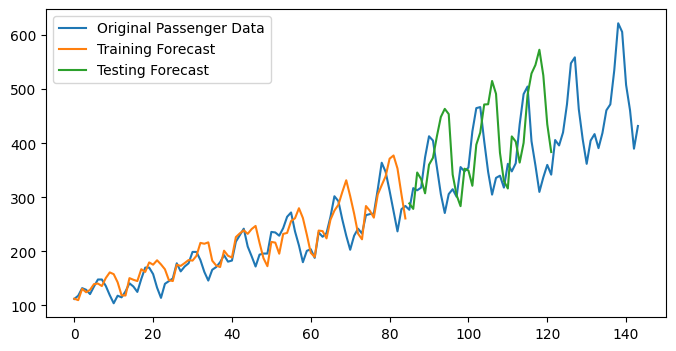

In [ ]:
# Выполняем прогнозирование на обучающей и тестовой выборках
train_forecast = flight_model.predict(train_input)  # Прогноз на обучающих данных
test_forecast = flight_model.predict(test_input)  # Прогноз на тестовых данных

# Обратная трансформация нормализованных прогнозов и целевых значений для получения оригинальных значений
train_forecast = scaler_toolbox.inverse_transform(train_forecast)  # Обратная нормализация прогнозов на обучающих данных
train_target = scaler_toolbox.inverse_transform([train_target])  # Обратная нормализация целевых значений на обучающих данных
test_forecast = scaler_toolbox.inverse_transform(test_forecast)  # Обратная нормализация прогнозов на тестовых данных
test_target = scaler_toolbox.inverse_transform([test_target])  # Обратная нормализация целевых значений на тестовых данных

# Оценка модели с использованием корня среднеквадратичной ошибки (RMSE) на обучающих данных
train_evaluation = np.sqrt(mean_squared_error(train_target[0], train_forecast[:, 0]))
print('Training Evaluation: %.2f RMSE' % (train_evaluation))

# Оценка модели на тестовых данных
test_evaluation = np.sqrt(mean_squared_error(test_target[0], test_forecast[:, 0]))
print('Testing Evaluation: %.2f RMSE' % (test_evaluation))

# Визуализация оригинальных данных и прогнозов
plt.figure(figsize=(8, 4))  # Устанавливаем размер графика
plt.plot(scaler_toolbox.inverse_transform(normalized_passenger_data), label='Original Passenger Data')  # Строим график оригинальных данных
plt.plot([item for item in train_forecast], label='Training Forecast')  # Строим график прогнозов на обучающих данных
plt.plot([item + len(train_forecast) for item in range(len(test_forecast))], test_forecast, label='Testing Forecast')  # Строим график прогнозов на тестовых данных

# Добавляем легенду и отображаем график
plt.legend()
plt.show()


### Установка

- https://practicum.yandex.ru/blog/vsyo-o-visual-studio-code/
- https://dzen.ru/a/W3wplczNDwCrOY5o - версия 3.10 / 3.11

In [ ]:
ё